In [1]:
#Dataset link - https://www.kaggle.com/datasets/brsdincer/star-type-classification 

# DATA PREPROCESSING 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv("/Users/soumobratamanna/Documents/AI_ML PROJECTS/Stars.csv")

In [4]:
df.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [5]:
df.tail(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
230,24145,382993.0,1494.0,-8.84,Blue-white,B,5
231,38234,272830.0,1356.0,-9.29,Blue,O,5
232,32489,648430.0,1948.5,-10.84,Blue,O,5
233,27739,849420.0,1252.0,-7.59,Blue-white,B,5
234,21904,748490.0,1130.0,-7.67,Blue-white,B,5
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [6]:
df['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [7]:
#Removing B,A,F ,K ,G from the spectral_class 

indexes=df[(df['Spectral_Class']=='A') | (df['Spectral_Class'] =='B')| (df['Spectral_Class'] =='F')|(df['Spectral_Class'] =='G')|(df['Spectral_Class'] =='K')].index
df.drop(indexes,inplace=True)

In [8]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [9]:
df.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
231,38234,272830.0,1356.0,-9.29,Blue,O,5
232,32489,648430.0,1948.5,-10.84,Blue,O,5
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [10]:
#Encoding M and O into 1 and 2
df['Spectral_Class'] = df['Spectral_Class'].map({'M':1,'O':2})

In [11]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,1,0
1,3042,0.000500,0.1542,16.60,Red,1,0
2,2600,0.000300,0.1020,18.70,Red,1,0
3,2800,0.000200,0.1600,16.65,Red,1,0
4,1939,0.000138,0.1030,20.06,Red,1,0


In [12]:
df.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
231,38234,272830.0,1356.0,-9.29,Blue,2,5
232,32489,648430.0,1948.5,-10.84,Blue,2,5
235,38940,374830.0,1356.0,-9.93,Blue,2,5
236,30839,834042.0,1194.0,-10.63,Blue,2,5
239,37882,294903.0,1783.0,-7.80,Blue,2,5


In [13]:
#Dropping the color column
df = df.drop(['Color'], axis=1)

In [14]:
#Differentiating between dependent and independent variables 
X = df.drop(['Temperature'],axis=1)
Y = df['Temperature']

In [15]:
X

,L,R,A_M,Spectral_Class,Type
0,0.002400,0.1700,16.12,1,0
1,0.000500,0.1542,16.60,1,0
2,0.000300,0.1020,18.70,1,0
3,0.000200,0.1600,16.65,1,0
4,0.000138,0.1030,20.06,1,0
...,...,...,...,...,...
231,272830.000000,1356.0000,-9.29,2,5
232,648430.000000,1948.5000,-10.84,2,5
235,374830.000000,1356.0000,-9.93,2,5
236,834042.000000,1194.0000,-10.63,2,5


In [16]:
Y

0       3068
1       3042
2       2600
3       2800
4       1939
       ...  
231    38234
232    32489
235    38940
236    30839
239    37882
Name: Temperature, Length: 151, dtype: int64

# LINEAR REGRESSION IMPLEMENTATIONS

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [19]:
X_train

,L,R,A_M,Spectral_Class,Type
67,0.000980,0.0911,16.450,1,0
186,0.000461,0.1190,17.450,1,0
1,0.000500,0.1542,16.600,1,0
160,223000.000000,57.0000,-5.920,2,4
132,0.008000,0.3100,11.170,1,1
...,...,...,...,...,...
70,0.021000,0.2730,12.300,1,1
129,0.000437,0.0856,18.090,1,0
165,131000.000000,24.0000,-7.220,2,4
195,0.002700,0.6700,13.667,1,1


In [20]:
X_test

,L,R,A_M,Spectral_Class,Type
184,0.000621,0.0773,17.080,1,0
18,0.003620,0.1967,13.530,1,1
199,0.002700,0.6750,14.776,1,1
167,198000.000000,39.0000,-5.830,2,4
169,424520.000000,24.0000,-5.990,2,4
120,0.000430,0.0912,17.160,1,0
125,0.000760,0.1210,19.630,1,0
14,0.000600,0.1400,11.782,1,1
5,0.000650,0.1100,16.980,1,0
214,198200.000000,6.3900,-4.570,2,3


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()


In [23]:
#Training part
model.fit(X_train,y_train)

LinearRegression()

In [24]:
#Making Predictions
predictions = model.predict(X_test)

In [25]:
predictions

array([ 4047.21622524,  2073.25592124,  1932.37667401, 19518.64878767,
       20572.9682121 ,  4038.06409974,  3752.95230823,  2274.80084432,
        4058.97485836, 21551.47763615, -1269.13840256,  2275.37844673,
        2110.21356766, 20105.70364498,  4147.79728419,  4964.31731011,
       21555.07433657,  3860.2526111 , -1603.58947539,  2310.88980948,
        5346.00612262,  2398.34900656, 19400.82319916,  -974.63484388,
       -1287.84614924,  2345.6779752 ,  4064.10392322,  1927.48417409,
       21622.23425688, 20214.65189917,  4070.41867214])

In [26]:
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

In [27]:
mse = mean_squared_error(y_test,predictions)
lr_score = r2_score(y_test, predictions)
mae =  mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test,predictions,squared=False)

In [28]:
mse

38625264.843733765

In [29]:
lr_score

0.6721764352646555

In [30]:
mae

3970.127464727466

In [31]:
rmse

6214.92275444625

# RANDOM FOREST REGRESSOR IMPLEMENTATIONS

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [33]:
from sklearn.ensemble import RandomForestRegressor


In [34]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [35]:
rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [36]:
y_predictions = rf.predict(X_test)

In [37]:
y_predictions


array([ 2985.07 ,  3117.078,  3430.241, 23911.583, 19240.246,  2877.844,
        2837.741,  2960.536,  3155.796, 33145.544,  3522.553,  3225.315,
        2933.497, 13238.905,  2938.539,  3691.884, 30970.855,  3040.468,
        3602.84 ,  3216.645,  3666.001,  3598.835, 16893.551,  3660.623,
        3498.021,  3199.58 ,  2990.608,  3211.076, 31585.014, 15919.439,
        2952.946])

In [38]:
from sklearn.metrics import mean_squared_error ,r2_score , mean_absolute_error

In [39]:
mse = mean_squared_error(y_test,y_predictions)
mae = mean_absolute_error(y_test,y_predictions)
rf_score = r2_score(y_test,y_predictions)
rmse = mean_squared_error(y_test,y_predictions, squared=False)

In [40]:
mse

11676407.250436258

In [41]:
rmse

3417.075833287324

In [42]:
rf_score

0.9008990238998807

In [43]:
mae 

1721.526451612903

# SUPPORT VECTOR REGRESSOR IMPLEMENTATIONS


In [44]:
#Dividing the datas between independent and dependent variable 
X = df.drop(['Temperature'],axis=1)
Y = df['Temperature']

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
#Scaling down the values for better training the model
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
sc_Y = StandardScaler() 
X = sc_X.fit_transform(X) 
Y = Y.values.reshape(-1,1)

In [47]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') 
regressor.fit(X, Y)

/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [48]:
predictions = regressor.predict(X)


In [49]:
predictions

array([3484.0562415 , 3484.00476349, 3484.16804584, 3484.00130985,
       3484.60611407, 3483.98749032, 3483.9872943 , 3483.99255436,
       3483.99485015, 3484.06649464, 3488.84799519, 3487.91382433,
       3486.93650328, 3489.04294996, 3487.9198339 , 3487.02102895,
       3486.16884303, 3488.74786985, 3486.75334001, 3488.41329607,
       3554.19771597, 3534.73185609, 3537.39042264, 3532.93286404,
       3534.74934405, 3536.27803587, 3537.31263889, 3532.35641851,
       3534.01676043, 3534.4838675 , 3539.37983755, 3540.48664122,
       3540.82464404, 3536.76347646, 3540.35024767, 3540.16278309,
       3538.47306003, 3539.48533555, 3540.8091622 , 3538.59987475,
       3484.04146653, 3483.9883655 , 3484.06052087, 3483.98787254,
       3484.21376802, 3483.98640348, 3484.09538716, 3484.0172597 ,
       3483.99214913, 3484.37129962, 3487.53238836, 3489.38945266,
       3486.94243578, 3487.79816899, 3488.66687854, 3487.93726781,
       3486.79225914, 3487.85172815, 3487.18476519, 3486.51936

In [50]:
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

In [51]:
mse = mean_squared_error(Y,predictions)
rmse = mean_squared_error(Y,predictions, squared = False)
mae = mean_absolute_error(Y,predictions)
svr_score = r2_score(Y,predictions)

In [52]:
mse

122151918.37567084

In [53]:
mae

5191.524248686771

In [54]:
rmse

11052.235899385736

In [55]:
svr_score

-0.22612776374629928

# GRAPH VISUALIZATION 

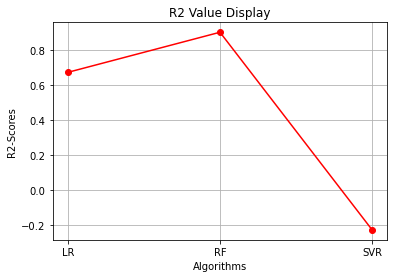

In [56]:
#LR - Linear Regression
#RF - Random Forest Regressor
#Support Vector Regressor
algorithms=["LR", "RF", "SVR"]
Scores=[lr_score,rf_score,svr_score]
plt.plot(algorithms,Scores , marker = 'o',color='red')
plt.grid()
plt.title("R2 Value Display")
plt.xlabel("Algorithms")
plt.ylabel("R2-Scores")
plt.show()